<a href="https://colab.research.google.com/github/Polgabarro/deep-learning-practices/blob/master/dppractica_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

from sklearn.datasets import make_circles, make_moons 

In [0]:
n = 500
p = 2

def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

#X, Y = make_circles(n_samples=n, factor=.5, noise=0.05)
#X, Y = make_moons(n_samples=n, noise=0.05)
X, Y = twospirals(n, noise=0.5)
#X*=10
Y = Y[:, np.newaxis]


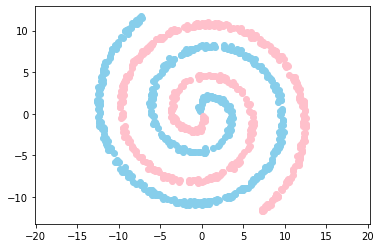

In [0]:
plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0, 1], c="skyblue")
plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1, 1], c="pink")
plt.axis('equal')

plt.show()

In [0]:
class neural_layer():
  def __init__ (self, n_connections, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) *2 -1
    self.w = np.random.rand(n_connections, n_neur) *2 -1
    
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
       lambda x: x * (1 - x))

relu = (lambda x: np.maximum(x, 0),
       lambda x: 1. * (x > 0))

tanh = (lambda x: np.tanh(x),
       lambda x: 1 - x**2)


In [0]:

def create_nn(topology):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l][0], topology[l+1][0], topology[l+1][1]))
    return nn



In [0]:
l2_cost = (lambda Yp, Yr: (1/2) * np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
    
    out = [(None, X)]
    
    # forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z,a))
            
    if train:
        #Backguard pass
        
        deltas = []
        
        for l in reversed(range(0, len(neural_net))):
                          
            z = out[l+1][0]
            a = out[l+1][1]
                          
            if l == len(neural_net) -1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))
                
            _w = neural_net[l].w
                
            #Gradient discent

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr
    
    return out[-1][1]

Epochs:  4600


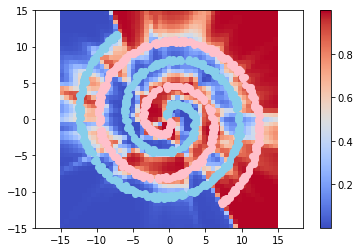

KeyboardInterrupt: 

In [0]:
import time
from IPython.display import clear_output


topology = [(p, tanh),(77, tanh),(77, tanh), (1, sigm)]
neural_n = create_nn(topology)
loss = []
lossTrain = []

#TO TEST 
X2, Y2 = twospirals(n, noise=0.5)

for i in range(30000):
    pY = train(neural_n, X, Y, l2_cost, lr=0.0005)

    if (i % 100 == 0):
        loss.append(l2_cost[0](pY, Y))
        pY2 = train(neural_n, X2, Y2, l2_cost, train=False)
        lossTrain.append(l2_cost[0](np.rint(pY2.T), Y2))
        
        res = 50
        
        _x0 = np.linspace(-15, 15, res)
        _x1 = np.linspace(-15, 15, res)
        
        _Y = np.zeros((res, res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
                
        clear_output(wait=True)
        print('Epochs: ',i)

        plt.pcolormesh(_x0, _x1, _Y.T, cmap = "coolwarm")
        plt.colorbar()
        plt.axis('equal')
        
        plt.scatter(X[Y[:, 0]==0,0], X[Y[:, 0]==0, 1], c="skyblue")
        plt.scatter(X[Y[:, 0]==1,0], X[Y[:, 0]==1, 1], c="pink")
        
        plt.show()
        t_lost, = plt.plot(range(len(loss)), loss, label='Train Lost')
        test_lost, = plt.plot(range(len(lossTrain)), lossTrain, c="red", label='Test Lost')
        plt.legend(handles=[t_lost, test_lost])

        plt.show()
        time.sleep(0.1)
        
        
    